### Problem Statement

You are a data scientist / AI engineer working on a classification problem to predict the weather type based on various weather-related features. You have been provided with a dataset named **`"weather_classification_data.csv"`**, which includes several parameters affecting weather conditions. The dataset comprises the following columns:

- temperature: The temperature in degrees Celsius.
- humidity: The humidity percentage.
- wind_speed: The wind speed in kilometers per hour.
- precipitation (%): The precipitation percentage.
- cloud_cover: The cloud cover description.
- atmospheric_pressure: The atmospheric pressure in hPa.
- uv_index: The UV index.
- season: The season during which the data was recorded.
- visibility (km): The visibility in kilometers.
- location: The type of location where the data was recorded.
- weather_type: The target variable for classification, indicating the weather type (Rainy, Sunny, Cloudy, Snowy).
  
Your task is to use this dataset to build and evaluate machine learning models to predict the weather type based on the given parameters. You will perform data preprocessing, exploratory data analysis, and model training using Support Vector Machine (SVM) with different kernels.

Dataset credits: Nikhil Narayan (https://www.kaggle.com/datasets/nikhil7280/weather-type-classification)

**Import Necessary Libraries**

In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay


### Task 1: Data Preparation and Exploration

1. Import the data from the `"weather_data.csv"` file and store it in a DataFrame.
2. Display the number of rows and columns in the dataset.
3. Display the first few rows of the dataset to understand its structure.
4. Check for any missing values in the dataset and handle them appropriately.
5. Visualize the distribution of key features using appropriate charts:
    - Visualize `season` using a pie chart.
    - Visualize `temperature, humidity, and wind_speed` using histograms.
    - Visualize `precipitation (%)` using a box plot.

In [12]:
# Step 1: Import the data from the "weather_data.csv" file
df = pd.read_csv("weather_classification_data.csv")

# Step 2: Display the number of rows and columns in the dataset
print(df.shape)

# Step 3: Display the first few rows of the dataset to understand its structure.
df.head()

(13200, 11)


,temperature,humidity,wind_speed,precipitation (%),cloud_cover,atmospheric_pressure,uv_index,season,visibility (km),location,weather_type
0,14,73,9.5,82,partly cloudy,1010.82,2,Winter,3.5,inland,Rainy
1,39,96,8.5,71,partly cloudy,1011.43,7,Spring,10.0,inland,Cloudy
2,30,64,7.0,16,clear,1018.72,5,Spring,5.5,mountain,Sunny
3,38,83,1.5,82,clear,1026.25,7,Spring,1.0,coastal,Sunny
4,27,74,17.0,66,overcast,990.67,1,Winter,2.5,mountain,Rainy


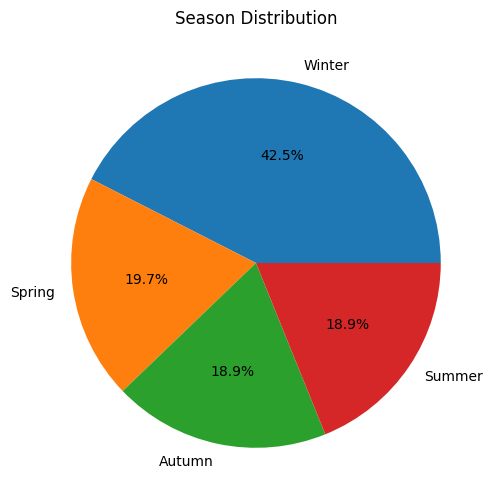

In [15]:
# Step 4: Visualize the distribution of key features
plt.figure(figsize=(6,6))
df["season"].value_counts().plot(kind="pie", autopct="%1.1f%%")
plt.title("Season Distribution")
plt.ylabel("")
plt.show()

# Visualize season using a pie chart


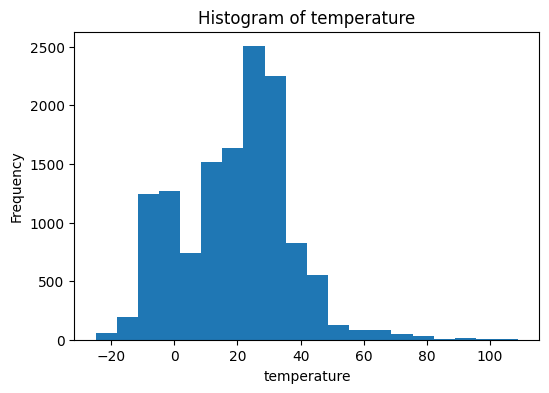

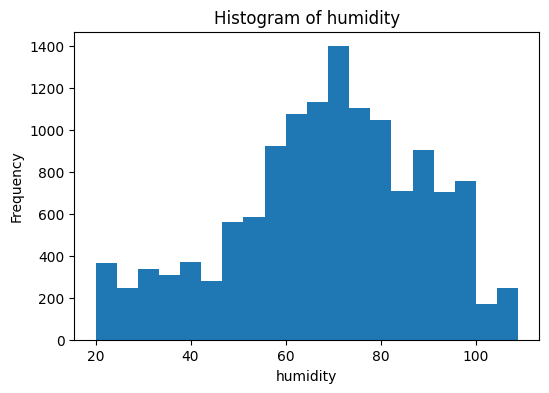

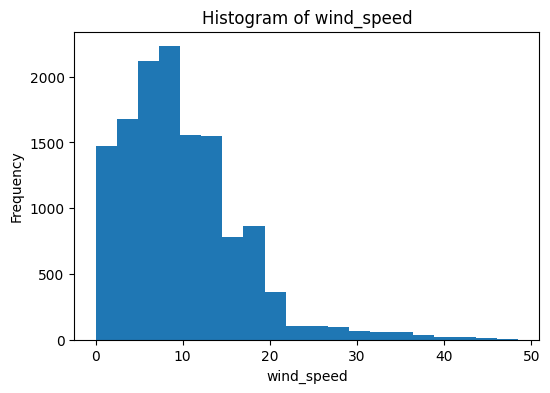

In [16]:
# Visualize temperature, humidity, and wind_speed using histograms

num_cols = ["temperature", "humidity", "wind_speed"]

for col in num_cols:
    plt.figure(figsize=(6,4))
    plt.hist(df[col], bins=20)
    plt.title(f"Histogram of {col}")
    plt.xlabel(col)
    plt.ylabel("Frequency")
    plt.show()


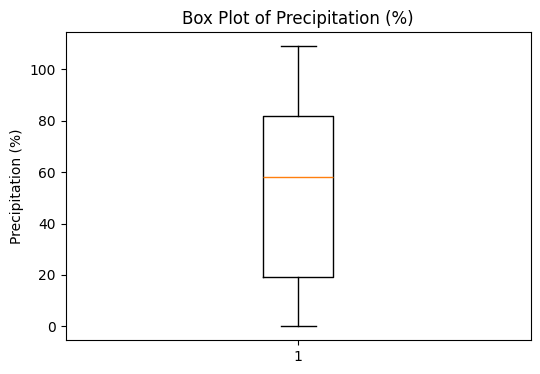

In [17]:
# Visualize precipitation (%) using a box plot
plt.figure(figsize=(6,4))
plt.boxplot(df["precipitation (%)"])
plt.title("Box Plot of Precipitation (%)")
plt.ylabel("Precipitation (%)")
plt.show()


### Task 2: Data Transformation

1. Encode cloud_cover, location and season using one-hot encoding.
2. Scale the numerical features (temperature, humidity, wind_speed, precipitation (%), atmospheric_pressure, uv_index, visibility (km)) using StandardScaler.
3. Display the first few rows of the updated dataset.

In [21]:
# Step 1: Encode cloud_cover, location and season using one-hot encoding.
df_encoded = pd.get_dummies(df , columns = ["cloud_cover" ,"location","season"], drop_first = True)


In [23]:
# Step 2: Scale the numerical features

from sklearn.preprocessing import StandardScaler

# numerical columns to scale
num_cols = ["temperature", "humidity", "wind_speed", "precipitation (%)",
            "atmospheric_pressure", "uv_index", "visibility (km)"]

scaler = StandardScaler()

# fit_transform scales and updates the columns
df_encoded[num_cols] = scaler.fit_transform(df_encoded[num_cols])


In [30]:
# Step3: Display the first few rows of the updated dataset.

# print("Before encoding:", df.shape)
# print("After encoding:", df_encoded.shape)
df_encoded.head()

,temperature,humidity,wind_speed,precipitation (%),atmospheric_pressure,uv_index,visibility (km),weather_type,cloud_cover_cloudy,cloud_cover_overcast,cloud_cover_partly cloudy,location_inland,location_mountain,season_Spring,season_Summer,season_Winter
0,-0.294931,0.212404,-0.048086,0.887629,0.134203,-0.520104,-0.582231,Rainy,False,False,True,True,False,False,False,True
1,1.143035,1.351385,-0.192836,0.543291,0.150602,0.776424,1.345768,Cloudy,False,False,True,True,False,True,False,False
2,0.625367,-0.233285,-0.409962,-1.178401,0.346579,0.257813,0.010999,Sunny,False,False,False,False,True,True,False,False
3,1.085516,0.707613,-1.206089,0.887629,0.549008,0.776424,-1.323769,Sunny,False,False,False,False,False,True,False,False
4,0.452811,0.261924,1.037543,0.386773,-0.407490,-0.779410,-0.878846,Rainy,False,True,False,False,True,False,False,True


### Task 3: Model Training Using SVM with Linear Kernel

1. Select the features and the target variable for modeling.
2. Split the data into training and test sets with a test size of 30%.
3. Initialize and train an SVM model with a linear kernel using the training data.
4. Print the model's accuracy score on test data.
5. Evaluate the model using a classification report and confusion matrix.

In [33]:
# Step 1: Select features and target variable
X = df_encoded.drop("weather_type", axis = 1)
y = df_encoded["weather_type"]

# Step 2: Split the data
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.30, random_state=42, stratify=y
)

In [34]:
# Step 3: Train SVM with linear kernel
# Step 3: Initialize and train SVM model (Linear Kernel)

svm_linear = SVC(kernel="linear")
svm_linear.fit(X_train, y_train)
# Step 4: Print accuracy score

from sklearn.metrics import accuracy_score

# Step 4: Predict + Accuracy
y_pred = svm_linear.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

print("SVM Linear Kernel Accuracy:", accuracy)


SVM Linear Kernel Accuracy: 0.8858585858585859


Classification Report:

              precision    recall  f1-score   support

      Cloudy       0.86      0.85      0.86       990
       Rainy       0.88      0.88      0.88       990
       Snowy       0.89      0.92      0.91       990
       Sunny       0.91      0.89      0.90       990

    accuracy                           0.89      3960
   macro avg       0.89      0.89      0.89      3960
weighted avg       0.89      0.89      0.89      3960

Confusion Matrix:
 [[842  87  26  35]
 [ 40 870  57  23]
 [ 37  12 913  28]
 [ 59  22  26 883]]


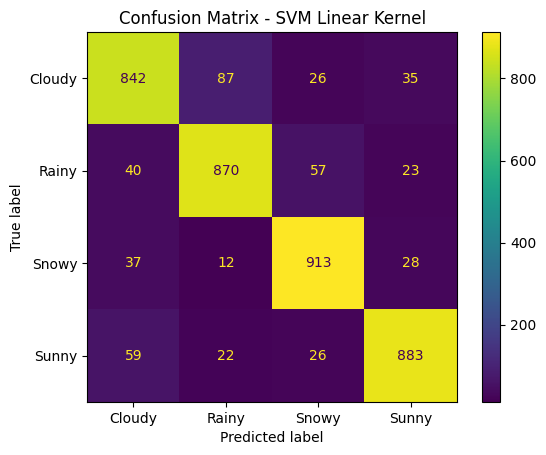

In [35]:
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# ✅ Classification Report
print("Classification Report:\n")
print(classification_report(y_test, y_pred))

# ✅ Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", cm)

# ✅ Plot Confusion Matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=svm_linear.classes_)
disp.plot()
plt.title("Confusion Matrix - SVM Linear Kernel")
plt.show()


### Task 4: Model Training Using SVM with RBF Kernel

1. Initialize and train an SVM model with an RBF kernel using the training data.
2. Print the model's accuracy score on test data.
3. Evaluate the model using a classification report and confusion matrix.

SVM  Kernel RBF Accuracy: 0.9088383838383839
using SVM  Kernel RBF Report:
               precision    recall  f1-score   support

      Cloudy       0.85      0.91      0.88       990
       Rainy       0.91      0.91      0.91       990
       Snowy       0.95      0.91      0.93       990
       Sunny       0.93      0.90      0.92       990

    accuracy                           0.91      3960
   macro avg       0.91      0.91      0.91      3960
weighted avg       0.91      0.91      0.91      3960

Confusion Matrix:
 [[904  48  13  25]
 [ 49 903  19  19]
 [ 47  21 899  23]
 [ 62  21  14 893]]


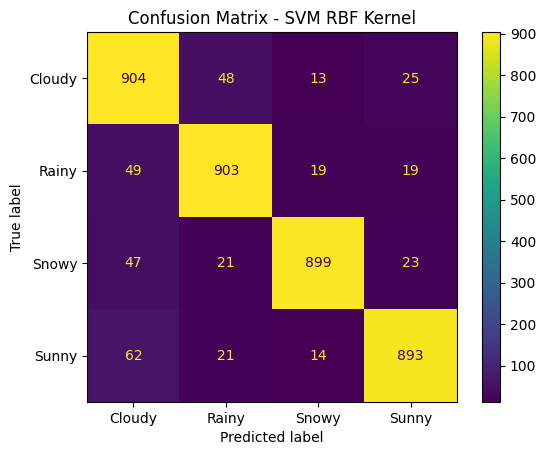

In [45]:
# Step 1: Train SVM with RBF kernel

svm_rbf = SVC(kernel="rbf", gamma="scale")
svm_rbf.fit(X_train, y_train)
svm_predicted = svm_rbf.predict(X_test)

# Step 2: Print accuracy score

svm_rbf_report = classification_report(y_test, svm_predicted)
rbf_accuarcy = accuracy_score(y_test, svm_predicted)

# Step 3: Evaluate the model
print("SVM  Kernel RBF Accuracy:", rbf_accuarcy)

#classification report
print("using SVM  Kernel RBF Report:\n" , svm_rbf_report)


#confusion matrix
cm = confusion_matrix(y_test, svm_predicted)
print("Confusion Matrix:\n", cm)

# ✅ Plot confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=svm_rbf.classes_)
disp.plot()
plt.title("Confusion Matrix - SVM RBF Kernel")
plt.show()


### Task 5: Experiment with Hyperparameters in SVM

1. Train an SVM model with an RBF kernel and the following hyperparameters:
    - C=0.5
    - gamma='auto'
    - kernel='rbf'
    - degree=2
      
Learn about these parameters here: [SVC Parameters](https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html)

--------------------------------------------------------------------------------------------------------------------------------------------------------

2. Print the model's accuracy score on test data.
3. Evaluate the model using a classification report and confusion matrix.

SVM  Kernel RBF Accuracy: 0.9053030303030303
using SVM  Kernel RBF Report:
               precision    recall  f1-score   support

      Cloudy       0.84      0.91      0.87       990
       Rainy       0.89      0.92      0.91       990
       Snowy       0.97      0.91      0.94       990
       Sunny       0.93      0.89      0.91       990

    accuracy                           0.91      3960
   macro avg       0.91      0.91      0.91      3960
weighted avg       0.91      0.91      0.91      3960

Confusion Matrix:
 [[897  58  11  24]
 [ 51 910  10  19]
 [ 46  22 898  24]
 [ 74  29   7 880]]


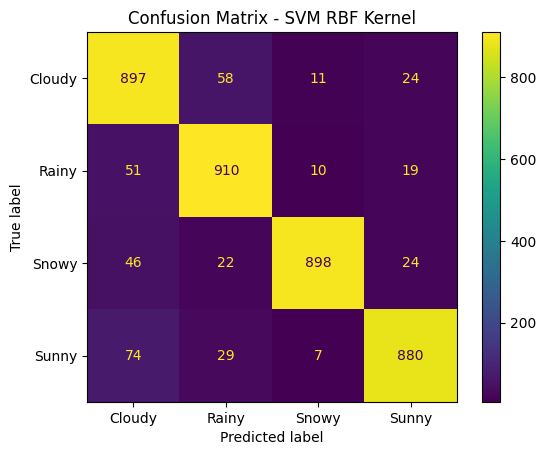

In [46]:
# Step 1: Train the SVM model with specified hyperparameters
svm_rbf = SVC(kernel="rbf", C=0.5,gamma='auto' ,degree=2)
svm_rbf.fit(X_train, y_train)
svm_predicted = svm_rbf.predict(X_test)


svm_rbf_report = classification_report(y_test, svm_predicted)
rbf_accuarcy = accuracy_score(y_test, svm_predicted)

# Step 3: Evaluate the model
print("SVM  Kernel RBF Accuracy:", rbf_accuarcy)

#classification report
print("using SVM  Kernel RBF Report:\n" , svm_rbf_report)


#confusion matrix
cm = confusion_matrix(y_test, svm_predicted)
print("Confusion Matrix:\n", cm)

# ✅ Plot confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=svm_rbf.classes_)
disp.plot()
plt.title("Confusion Matrix - SVM RBF Kernel")
plt.show()


### Task 6: Implementing Sklearn Pipeline

1. Create a pipeline that includes the StandardScaler and the SVM model with an RBF kernel.
2. Train the pipeline using the training data.
3. Evaluate the pipeline using the test data and print the classification report.

Classification Report (Pipeline RBF SVM):

              precision    recall  f1-score   support

      Cloudy       0.85      0.91      0.88       990
       Rainy       0.90      0.92      0.91       990
       Snowy       0.96      0.91      0.93       990
       Sunny       0.94      0.89      0.92       990

    accuracy                           0.91      3960
   macro avg       0.91      0.91      0.91      3960
weighted avg       0.91      0.91      0.91      3960

Confusion Matrix:
 [[901  57  13  19]
 [ 50 913  13  14]
 [ 49  20 898  23]
 [ 61  30  13 886]]


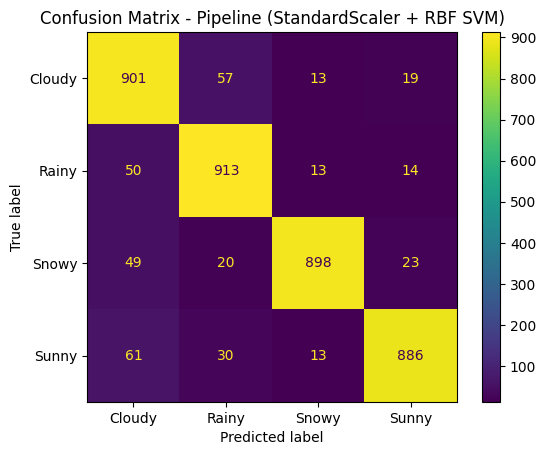

In [48]:
# ✅ Create a pipeline with two steps: scaling and SVM with RBF kernel
pipeline = Pipeline([
    ("scale", StandardScaler()),
    ("svc", SVC(kernel="rbf", gamma="scale"))
])

# ✅ Fit the pipeline on the training data
pipeline.fit(X_train, y_train)

# ✅ Make predictions using the pipeline on the test data
pipeline_predict = pipeline.predict(X_test)

# ✅ Print the classification report
print("Classification Report (Pipeline RBF SVM):\n")
print(classification_report(y_test, pipeline_predict))

# ✅ Confusion matrix
cm = confusion_matrix(y_test, pipeline_predict)
print("Confusion Matrix:\n", cm)

# ✅ Plot confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=pipeline.classes_)
disp.plot()
plt.title("Confusion Matrix - Pipeline (StandardScaler + RBF SVM)")
plt.show()
